In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl


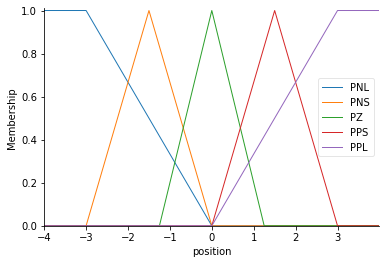

In [2]:
position = ctrl.Antecedent(np.arange(-4, 4, 0.01), 'position')
position['PNL'] = fuzz.trapmf(position.universe, [-4, -4, -3, 0])
position['PNS'] = fuzz.trimf(position.universe, [-3, -1.5, 0])
position['PZ'] = fuzz.trimf(position.universe, [-1.25, 0, 1.25])
position['PPS'] = fuzz.trimf(position.universe, [0, 1.5, 3])
position['PPL'] = fuzz.trapmf(position.universe, [0, 3, 4, 4])
position.view()

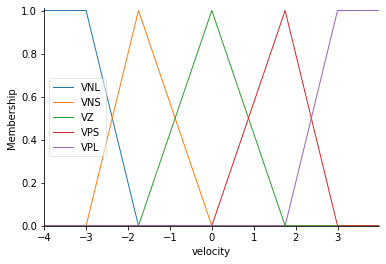

In [3]:
velocity = ctrl.Antecedent(np.arange(-4, 4, 0.01), 'velocity')
velocity['VNL'] = fuzz.trapmf(velocity.universe, [-4, -4, -3, -1.75])
velocity['VNS'] = fuzz.trimf(velocity.universe, [-3, -1.75, 0])
velocity['VZ'] = fuzz.trimf(velocity.universe, [-1.75, 0, 1.75])
velocity['VPS'] = fuzz.trimf(velocity.universe, [0, 1.75, 3])
velocity['VPL'] = fuzz.trapmf(velocity.universe, [1.75, 3, 4, 4])
velocity.view()

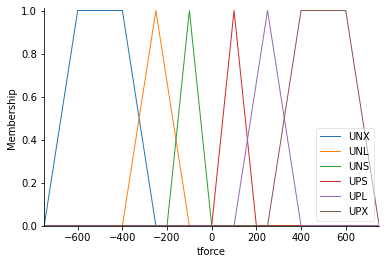

In [4]:
tforce = ctrl.Consequent(np.arange(-750, 750, 1), 'tforce')
tforce['UNX'] = fuzz.trapmf(tforce.universe, [-750, -600, -400, -250])
tforce['UNL'] = fuzz.trimf(tforce.universe, [-400, -250, -100])
tforce['UNS'] = fuzz.trimf(tforce.universe, [-200, -100, 0])
tforce['UPS'] = fuzz.trimf(tforce.universe, [0, 100, 200])
tforce['UPL'] = fuzz.trimf(tforce.universe, [100, 250, 400])
tforce['UPX'] = fuzz.trapmf(tforce.universe, [250, 400, 600, 750])

tforce.view()

468.64853163142624


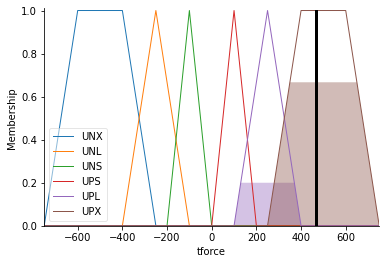

In [5]:
rule1 = ctrl.Rule(position['PNL'] & velocity['VNL'], tforce['UNX'])
rule2 = ctrl.Rule(position['PNL'] & velocity['VNS'], tforce['UNX'])
rule3 = ctrl.Rule(position['PNL'] & velocity['VZ'], tforce['UNL'])
rule4 = ctrl.Rule(position['PNL'] & velocity['VPS'], tforce['UNS'])
rule5 = ctrl.Rule(position['PNS'] & velocity['VNL'], tforce['UNX'])
rule6 = ctrl.Rule(position['PNS'] & velocity['VNS'], tforce['UNL'])
rule7 = ctrl.Rule(position['PNS'] & velocity['VZ'], tforce['UNS'])
rule8 = ctrl.Rule(position['PNS'] & velocity['VPL'], tforce['UPS'])
rule9 = ctrl.Rule(position['PZ'] & velocity['VNL'], tforce['UNL'])
rule10 = ctrl.Rule(position['PZ'] & velocity['VNS'], tforce['UNS'])
rule11 = ctrl.Rule(position['PZ'] & velocity['VPS'], tforce['UPS'])
rule12 = ctrl.Rule(position['PZ'] & velocity['VPL'], tforce['UPL'])
rule13 = ctrl.Rule(position['PPS'] & velocity['VNL'], tforce['UNS'])
rule14 = ctrl.Rule(position['PPS'] & velocity['VZ'], tforce['UPS'])
rule15 = ctrl.Rule(position['PPS'] & velocity['VPS'], tforce['UPL'])
rule16 = ctrl.Rule(position['PPS'] & velocity['VPL'], tforce['UPX'])
rule17 = ctrl.Rule(position['PPL'] & velocity['VNS'], tforce['UPS'])
rule18 = ctrl.Rule(position['PPL'] & velocity['VZ'], tforce['UPL'])
rule19 = ctrl.Rule(position['PPL'] & velocity['VPS'], tforce['UPX'])
rule20 = ctrl.Rule(position['PPL'] & velocity['VPL'], tforce['UPX'])

traction_force_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20])
traction_force_sim = ctrl.ControlSystemSimulation(traction_force_ctrl)

traction_force_sim.input['position'] = 1
traction_force_sim.input['velocity'] = 3

traction_force_sim.compute()

print(traction_force_sim.output['tforce'])
tforce.view(sim=traction_force_sim)